## K-nearest Neighbors Regressor

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [47]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/data_analytics/KNN_reg_data.csv'
df1=pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
df1.head()

,Unnamed: 0,X,Y
0,0,0.000000,0.374540
1,1,0.121212,1.538001
2,2,0.242424,1.799133
3,3,0.363636,1.955545
4,4,0.484848,1.573701


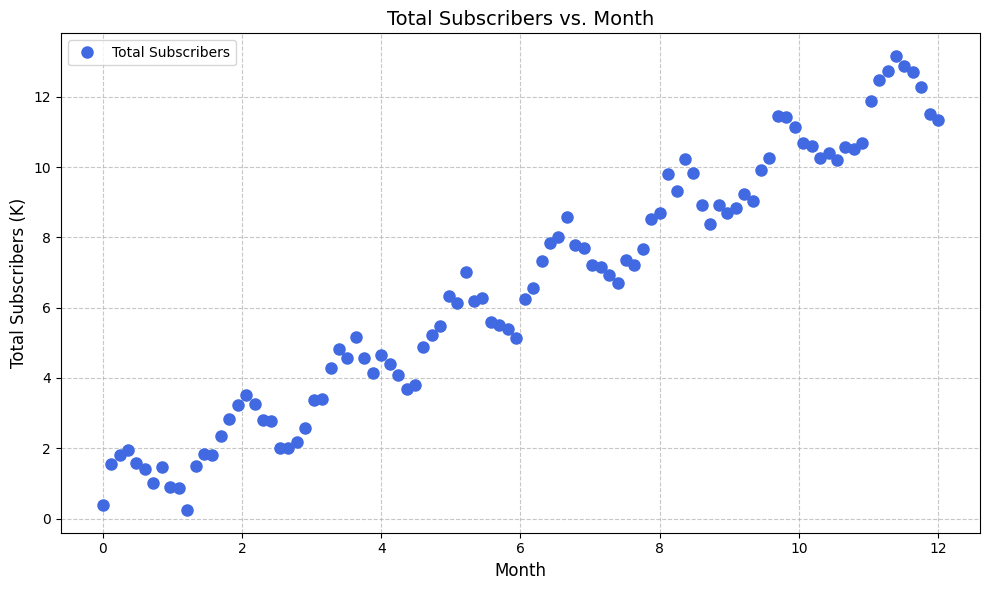

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(df1.X, df1.Y, 'o', markersize=8, color='royalblue', label='Total Subscribers')  # Customize markers and color
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Subscribers (K)', fontsize=12)
plt.title('Total Subscribers vs. Month', fontsize=14)  # Add a title
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [50]:
df1[df1.X>10] # see results for nov and dec

,Unnamed: 0,X,Y
83,83,10.060606,10.687387
84,84,10.181818,10.605989
85,85,10.303030,10.265278
86,86,10.424242,10.398448
87,87,10.545455,10.209273
88,88,10.666667,10.586258
89,89,10.787879,10.521635
90,90,10.909091,10.689610
91,91,11.030303,11.882016
92,92,11.151515,12.496394


Column X (feature) is Column with dimension of 1. scikit-learn's API requires the sample in the form of 2 dimensional array even tough it contains only 1 feature. First dimension is index and second dimension is feature X

In [51]:
# add dimensions to 1d arrays
print('Before: ', df1.X.shape) # 1d array
x1 = df1.X.values[:, np.newaxis]

print('After: ', x1.shape)  # 2d array
#print('Before: ', df1.Y.shape)
y1 = df1.Y.values[:, np.newaxis]
#print('After: ', y1.shape)

Before:  (100,)
After:  (100, 1)


In [52]:
x2 = df1.X.values
x2.shape
x3 = x2.reshape(-1,1)
x3.shape

(100, 1)

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.22, random_state=55)

In [54]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=5)
kneighbor_regression.fit(x_train, y_train)

KNeighborsRegressor()

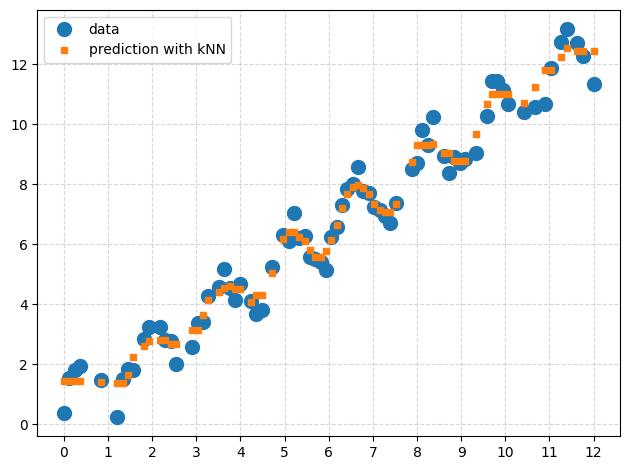

In [55]:
y_pred_train = kneighbor_regression.predict(x_train) # Pass x_train to predict
                                                     # kneighbor_regression was trained on x_train,
                                                     # so it expects input data with similar shape
                                                     # to make predictions.
plt.plot(x_train[:,0], y_train, 'o', label="data", markersize=10)
plt.plot(x_train[:,0], y_pred_train, 's', label="prediction with kNN", markersize=4)
plt.legend(loc='best');
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=10, loc='upper left')
plt.xticks(np.arange(min(x_train[:, 0]), max(x_train[:, 0]) + 1, 1.0))
plt.tight_layout()

what was the number of neighbors in the previous plot?


In [56]:
kneighbor_regression.score(x_train, y_train)

0.98348376479687

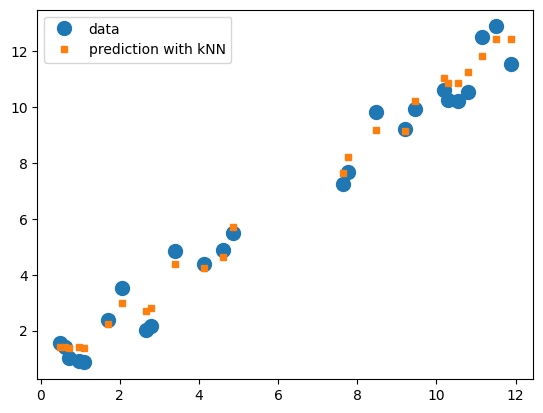

In [57]:
y_pred_test = kneighbor_regression.predict(x_test)

plt.plot(x_test[:,0], y_test, 'o', label="data", markersize=10)
plt.plot(x_test[:,0], y_pred_test, 's', label="prediction with kNN", markersize=4)
plt.legend(loc='best');

# this predicts y value of closest point in training dataset

In [58]:
kneighbor_regression.score(x_test, y_test)

0.9850021345057294

Increase the number of nearest neighbors from 1 to 2, 3, 4, 5,& 6. Study the corresponding effects on data with the newly constructed seasonality feature.



In [59]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(x_train, y_train) ## nothing happens here

KNeighborsRegressor(n_neighbors=1)

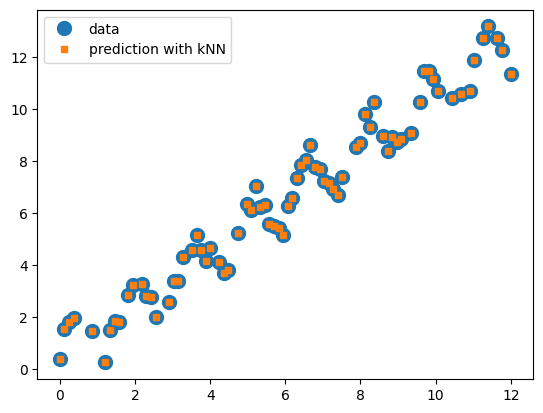

In [60]:
y_pred_train = kneighbor_regression.predict(x_train)
plt.plot(x_train[:,0], y_train, 'o', label="data", markersize=10)
plt.plot(x_train[:,0], y_pred_train, 's', label="prediction with kNN", markersize=4)
plt.legend(loc='best');

On the training set, we do a perfect job: each point is its own nearest neighbor! (Does this even make sense?) if yes, is it a good idea to use k=1?


In [61]:
kneighbor_regression.score(x_train, y_train)

1.0

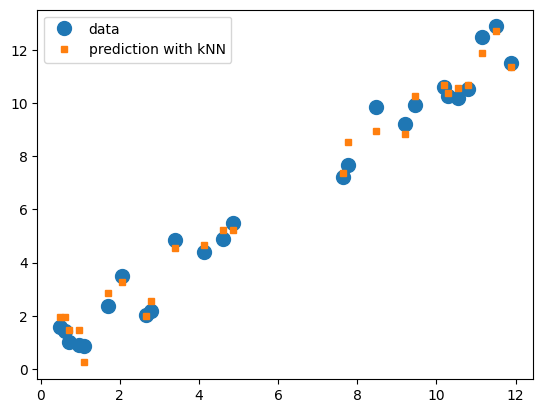

In [62]:
y_pred_test = kneighbor_regression.predict(x_test)

plt.plot(x_test[:,0], y_test, 'o', label="data", markersize=10)
plt.plot(x_test[:,0], y_pred_test, 's', label="prediction with kNN", markersize=4)
plt.legend(loc='best');

# this predicts y value of closest point in training dataset

In [63]:
kneighbor_regression.score(x_test, y_test)

0.9889179665975042

In [64]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=10)
kneighbor_regression.fit(x_train, y_train) ## nothing happens here

KNeighborsRegressor(n_neighbors=10)

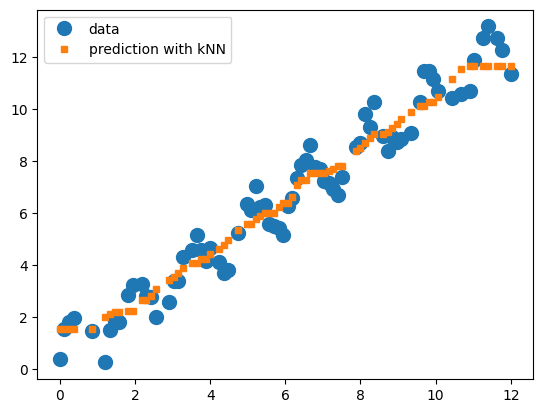

In [65]:
y_pred_train = kneighbor_regression.predict(x_train)

plt.plot(x_train[:,0], y_train, 'o', label="data", markersize=10)
plt.plot(x_train[:,0], y_pred_train, 's', label="prediction with kNN", markersize=4)
plt.legend(loc='best');

what is the number of neighbors int he preivous plot? do the results look good? How would find the best outcome?

In [66]:
kneighbor_regression.score(x_train, y_train)

0.9527204548375867

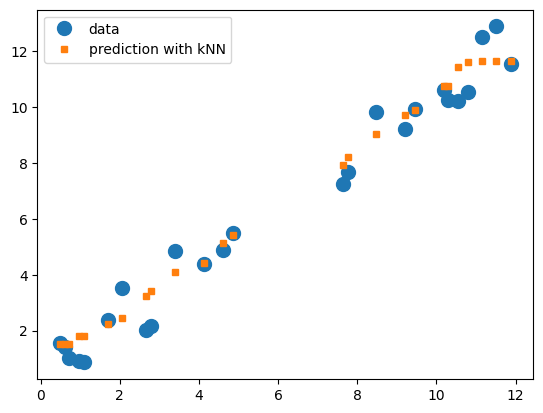

In [67]:
y_pred_test = kneighbor_regression.predict(x_test)

plt.plot(x_test[:,0], y_test, 'o', label="data", markersize=10)
plt.plot(x_test[:,0], y_pred_test, 's', label="prediction with kNN", markersize=4)
plt.legend(loc='best');

# this predicts y value of closest point in training dataset

In [68]:
kneighbor_regression.score(x_test, y_test)

0.9667780099143475